<div>
    <img src="../images/emlyon.png" style="height:60px; float:left; padding-right:10px; margin-top:5px" />
    <span>
        <h1 style="padding-bottom:5px;"> Introduction to Deep Learning </h1>
        <a href="https://masters.em-lyon.com/fr/msc-in-data-science-artificial-intelligence-strategy">[DSAIS]</a> MSc in Data Science & Artificial Intelligence Strategy <br/>
         Paris | © Saeed VARASTEH
    </span>
</div>

<div class="alert-info" style="border-bottom: solid 1px lightgray; background-color:#fff4e3;">
    <img src="../images/homework.png" style="height:60px; float:left; padding-right:10px;" />
    <span style="font-weight:bold; color:#db9425">
        <h4 style="padding-top:25px;"> HOMEWORK 01 </h4>
    </span>
</div>

<a id = "top"></a>
### Homework 01 - House Price Prediction

---

You are given __`house.csv`__ file containing the sale prices of several houses.

You are going to build a PyTorch model to predict the price of a house based on the features provided in the dataset, such as the number of rooms, type of the property, land size, etc.

Here are the steps you need to follow:

[__Step 1: Preparing Data__](#step1)

1. Import the dataset into a dataframe.
2. Fill the missing `Car` values with the mean of the `Car` column.
3. Drop the remaining rows with null values.

<span style="color:gray">You should be left with 6858 rows of data after this step.</span>

4. The dataset contains 3 string/object columns; Drop `Suburb` column and encode the two others using pandas's `get_dummies()`.

<span style="color:gray">You should be left with 24 columns in your dataframe.</span>

5. Create input (`X`) and output (`y`) __matrices__ using `Price` column as the output feature and the 23 others as input features.

<span style="color:gray">Make sure that <b>y</b> has (6858,1) dimension.</span>

6. Use the `train_test_split()` function from __sklearn__ to create `X_train`, `X_test`, `y_train`, and `y_test`. Use an 80/20 split and set the `random_state` to 72.
7. Use __sklearn__ `MinMaxScaler` to normalize your data. Fit a scaler on `X_train` and use it to transform both `X_train` and `X_test`. Similarly, fit a scaler on `y_train` and use it to transorm `y_train`, and `y_test`.

[__Step 2: PyTorch Datasets and DataLoader__](#step2)

1. Create a PyTorch `Dataset` with `X_train` and `y_train`.
2. Use PyTorch's `random_split()` function to divide your dataset into training and validation. Keep 5000 instances in the training dataset and the remaining 486 for validation.
3. Create train and validation `DataLoader`s.

[__Step 3: Model Training and Prediction__](#step3)

1. Build a PyTorch model with a single `Linear` neuron with23 input features and 1 output feature.
2. Train the model on train data and evaluate it on the validation dataset.
3. Plot the learning curves.
4. Make predictions using your model on the test data set and report the __$R^2$__ score.

---

<a id = "step1"></a>

### __Step 1: Preparing Data__

[Back to top](#top)

In [21]:
# Libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

import torch
import torch.nn as nn
import torch.optim as optim

from torch.utils.data import Dataset
from torch.utils.data import random_split
from torch.utils.data import DataLoader

torch.manual_seed(49)
device = "cpu"

In [22]:
# Import the data

house = pd.read_csv("house.csv")

In [23]:
house["Car"].isna().sum()

62

In [24]:
house["Car"].fillna(house["Car"].mean(), inplace=True)
house["Car"].isna().sum()

0

In [25]:
house.dropna(inplace=True)

In [26]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6858 entries, 1 to 13579
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         6858 non-null   object 
 1   Rooms          6858 non-null   int64  
 2   Type           6858 non-null   object 
 3   Price          6858 non-null   float64
 4   Distance       6858 non-null   float64
 5   Postcode       6858 non-null   float64
 6   Bedroom2       6858 non-null   float64
 7   Bathroom       6858 non-null   float64
 8   Car            6858 non-null   float64
 9   Landsize       6858 non-null   float64
 10  BuildingArea   6858 non-null   float64
 11  YearBuilt      6858 non-null   float64
 12  Lattitude      6858 non-null   float64
 13  Longtitude     6858 non-null   float64
 14  Regionname     6858 non-null   object 
 15  Propertycount  6858 non-null   float64
dtypes: float64(12), int64(1), object(3)
memory usage: 910.8+ KB


In [27]:
# Drop the remaining rows with null values.
house.drop("Suburb", axis=1, inplace=True)

<a id = "step2"></a>
#### __Step 2: PyTorch Datasets and DataLoader__
[Back to top](#top)

In [28]:
# The dataset contains 3 string/object columns; Drop `Suburb` column and encode the two others using pandas's `get_dummies()`.
house = pd.get_dummies(house, columns=["Type", "Regionname"], dummy_na=False)

In [29]:
house

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,...,Type_t,Type_u,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
1,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,...,0,0,0,0,1,0,0,0,0,0
2,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,...,0,0,0,0,1,0,0,0,0,0
4,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,...,0,0,0,0,1,0,0,0,0,0
6,3,1876000.0,2.5,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,...,0,0,0,0,1,0,0,0,0,0
7,2,1636000.0,2.5,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13572,2,650000.0,14.5,3087.0,2.0,1.0,1.0,210.0,79.0,2006.0,...,0,0,0,0,1,0,0,0,0,0
13573,4,635000.0,14.7,3030.0,4.0,2.0,1.0,662.0,172.0,1980.0,...,0,0,0,0,0,0,0,0,1,0
13576,3,1031000.0,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,...,0,0,0,0,0,0,0,0,1,0
13578,4,2500000.0,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,...,0,0,0,0,0,0,0,0,1,0


In [30]:
# Create input (`X`) and output (`y`) __matrices__ using `Price` column as the output feature and the 23 others as input features.

X = house.drop(["Price"], axis=1)
y = house[['Price']]

In [31]:
y.shape

(6858, 1)

In [32]:
# Use the `train_test_split()` function from __sklearn__ to create `X_train`, `X_test`, `y_train`, and `y_test`. Use an 80/20 split and set the `random_state` to 72.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=72)

In [33]:
# Use __sklearn__ `MinMaxScaler` to normalize your data. Fit a scaler on `X_train` and use it to transform both `X_train` and `X_test`. Similarly, fit a scaler on `y_train` and use it to transorm `y_train`, and `y_test`.

scaler_X = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = MinMaxScaler()
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

# Check Dimension
X_train_scaled.shape, X_test_scaled.shape, y_train_scaled.shape, y_test_scaled.shape, X_train.shape[1]

((5486, 23), (1372, 23), (5486, 1), (1372, 1), 23)

In [34]:
# Create a PyTorch `Dataset` with `X_train` and `y_train`.

class MyData(Dataset):
    def __init__(self, data, targets):
        self.data = torch.from_numpy(data).float()
        self.targets = torch.from_numpy(targets).float()
    
    def __len__(self):
        return self.data.shape[0]
    
    def __getitem__(self, index):
        return (self.data[index], self.targets[index])
    
train_dataset = MyData(X_train_scaled, y_train_scaled)
display(len(train_dataset))
train_dataset[7]

5486

(tensor([0.1429, 0.1139, 0.1034, 0.2222, 0.0000, 0.1000, 0.0766, 0.0641, 0.7447,
         0.4634, 0.5302, 0.4676, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 1.0000, 0.0000, 0.0000]),
 tensor([0.0915]))

In [35]:
# Use PyTorch's `random_split()` function to divide your dataset into training and validation. Keep 5000 instances in the training dataset and the remaining 486 for validation.

train_dataset, val_dataset = random_split(train_dataset, [5000, 486])
len(train_dataset), len(val_dataset)

(5000, 486)

In [36]:
# Create train and validation `DataLoader`s.

train_loader = DataLoader(dataset = train_dataset, batch_size = 250)
val_loader = DataLoader(dataset = val_dataset, batch_size = 128)
len(train_loader), len(val_loader)

(20, 4)

<a id = "step3"></a>
#### __Step 3: Model Training and Prediction__
[Back to top](#top)

In [37]:
# Build a PyTorch model with a single `Linear` neuron with 23 input features and 1 output feature.
class Mymodel(nn.Module):
    def __init__(self):
        super().__init__()
        self.neuron = nn.Linear(23,1)
        
    def forward(self, x):
        out = self.neuron(x)
        return out

In [38]:
# Train the model on train data and evaluate it on the validation dataset.
# Training Model v.1

model = Mymodel().to(device)
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

# n_epochs = 1000
n_epochs = 100
# n_epochs = 20
# n_epochs = 10

train_losses = []
val_losses = []
# Training loop
# Training iteration
for e in range(n_epochs):
    
    model.train()
    loss_train = 0
    for x_batch, y_batch in train_loader:
        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device)
        
        y_hat = model(x_batch)
        loss = loss_fn(y_hat, y_batch)
        
        loss_train = loss_train + loss.item()
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    loss_train = loss_train / len(train_loader)  # average of the losses for an epoch
    train_losses.append(loss_train)
    
    # Validation Loop
    model.eval()
    loss_val = 0
    
    for x_batch, y_batch in val_loader:
        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device)
        
        y_hat = model(x_batch)
        loss = loss_fn(y_hat, y_batch)
        
        loss_val = loss_val + loss.item()
    
    loss_val = loss_val / len(val_loader)
    val_losses.append(loss_val)
        
model.state_dict()


OrderedDict([('neuron.weight',
              tensor([[ 0.1644, -0.1841, -0.0225, -0.0669,  0.1468,  0.0475,  0.1782,  0.2091,
                       -0.0666, -0.0294, -0.0012, -0.0005,  0.0232,  0.0049, -0.0173,  0.0227,
                        0.0826,  0.0040,  0.0132,  0.0399,  0.0521, -0.0072, -0.0025]])),
             ('neuron.bias', tensor([0.1096]))])

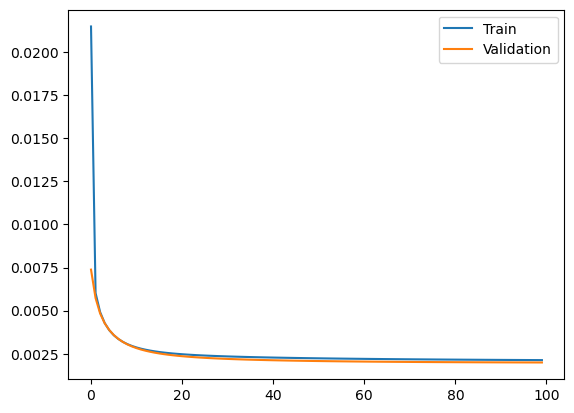

In [39]:
# Plot the learning curves.

plt.plot(train_losses, label = "Train")
plt.plot(val_losses, label = "Validation")

plt.legend()
plt.show()

In [40]:
# Make predictions using your model on the test data set and report the __$R^2$__ score.

X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)

# Turn the model to evaluation
model.eval()

# To improve the performance and reduce the difficult during the calculation, I won't calculate the gradient this time
with torch.no_grad():
    # Predict
    predictions = model(X_test_tensor.to(device)).cpu()

predictions_unscaled = scaler_y.inverse_transform(predictions.numpy())
y_test_unscaled = scaler_y.inverse_transform(y_test_scaled)

# Compute R^2 score
r2_score = r2_score(y_test_unscaled, predictions_unscaled)
print(f'R^2 score: {r2_score}')

R^2 score: 0.6197016387943348
